In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

2. Load the dataset

In [3]:
obj=pd.read_csv("/content/abalone - abalone.csv")

3. Perform Below Visualizations

a) Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


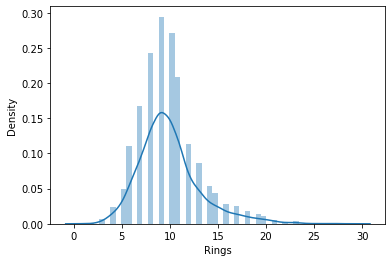

In [4]:
sns.distplot(obj['Rings'])

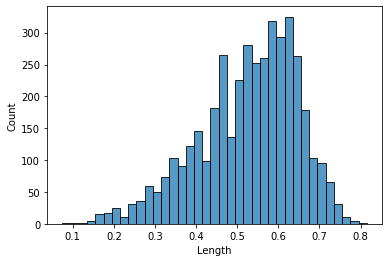

In [5]:
sns.histplot(obj['Length'])

b) Bi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


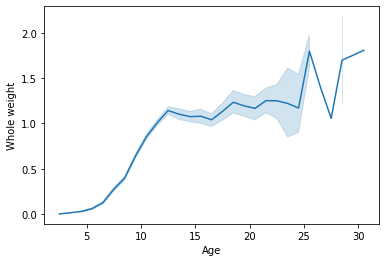

In [6]:
sns.lineplot(obj['Age'],obj['Whole weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


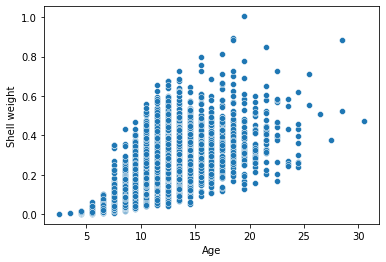

In [7]:
sns.scatterplot(obj['Age'],obj['Shell weight'])


c)Multi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


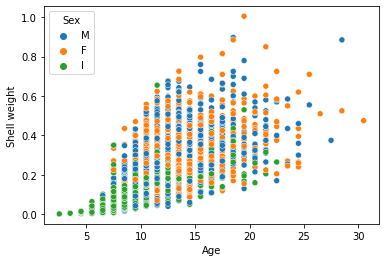

In [8]:
sns.scatterplot(obj['Age'],obj['Shell weight'],obj['Sex'])

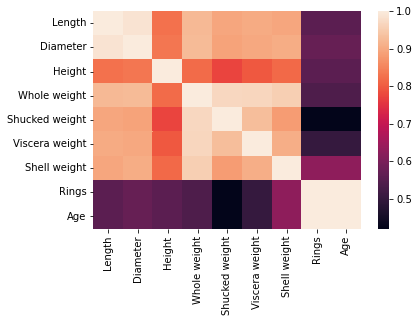

In [9]:
sns.heatmap(obj.corr())

4. Perform descriptive statistics on the dataset

In [10]:
obj.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length             0.523992
Diameter           0.407881
Height             0.139516
Whole weight       0.828742
Shucked weight     0.359367
Viscera weight     0.180594
Shell weight       0.238831
Rings              9.933684
Age               11.433684
dtype: float64

In [11]:
obj.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


5. Check for Missing values and deal with them.

In [12]:
obj.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

6. Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


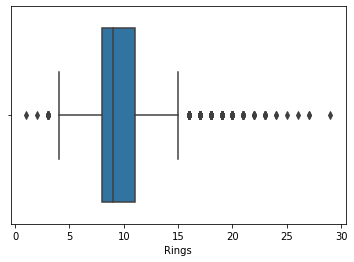

In [13]:
sns.boxplot(obj['Rings'])

In [14]:
q=obj.quantile([0.95,0.75])
q

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0.95,0.690,0.545,0.200,1.6949,0.7402,0.3796,0.480,16.0,17.5
0.75,0.615,0.480,0.165,1.1530,0.5020,0.2530,0.329,11.0,12.5


In [15]:
iqr=q.iloc[0]-q.iloc[1]
iqr

Length            0.0750
Diameter          0.0650
Height            0.0350
Whole weight      0.5419
Shucked weight    0.2382
Viscera weight    0.1266
Shell weight      0.1510
Rings             5.0000
Age               5.0000
dtype: float64

In [16]:
u=q.iloc[0]+(1.5*iqr)
u

Length             0.80250
Diameter           0.64250
Height             0.25250
Whole weight       2.50775
Shucked weight     1.09750
Viscera weight     0.56950
Shell weight       0.70650
Rings             23.50000
Age               25.00000
dtype: float64

In [17]:
l=q.iloc[1]-(1.5*iqr)
l

Length            0.50250
Diameter          0.38250
Height            0.11250
Whole weight      0.34015
Shucked weight    0.14470
Viscera weight    0.06310
Shell weight      0.10250
Rings             3.50000
Age               5.00000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


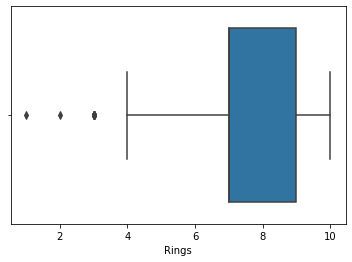

In [18]:
obj['Rings']=np.where(obj['Rings']>10,7,obj['Rings'])
sns.boxplot(obj['Rings'])

7. Check for Categorical columns and perform encoding.

In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
obj['Sex']=le.fit_transform(obj['Sex'])
obj.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,7,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


8. Split the data into dependent and independent variables

In [20]:
x=obj.iloc[:,0:8]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [21]:
y=obj['Age']
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

9. Scale the independent variables

In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
s=StandardScaler()
x_scale=s.fit_transform(x)
x_scale

array([[ 1.15198011, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [ 1.15198011, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.28068972,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 1.15198011,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.28068972,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.15198011,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

10. Split the data into training and testing

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.3,random_state=0)
x_train

array([[ 1.15198011,  0.79954256,  1.0291325 , ...,  0.95582578,
         0.52833755,  1.0860944 ],
       [-0.0643548 , -1.49062526, -1.54070702, ..., -1.14612796,
        -1.31014717, -1.35667992],
       [-0.0643548 , -1.24078877, -1.33915098, ..., -1.19118592,
        -1.15047728, -1.24172584],
       ...,
       [ 1.15198011,  0.59134549,  0.42446438, ...,  0.46694694,
         0.23636976,  0.10539235],
       [-1.28068972,  0.84118198,  0.82757646, ...,  0.53002808,
         0.51008957,  0.57239333],
       [-0.0643548 , -0.94931287, -0.83526087, ..., -1.02221858,
        -0.96343541, -0.99026378]])

In [24]:
x_train.shape

(2923, 8)

In [25]:
x_test

array([[ 1.15198011,  0.21659075,  0.17251933, ..., -0.36887819,
         0.56939553,  0.69093973],
       [-0.0643548 , -0.1998034 , -0.07942572, ..., -0.44322382,
        -0.34300384, -0.32568547],
       [ 1.15198011,  0.79954256,  0.72679844, ...,  0.75531787,
         1.7646387 ,  0.56520869],
       ...,
       [-1.28068972,  0.92446081,  0.87796547, ...,  0.68547803,
         1.16245511,  0.35685441],
       [ 1.15198011,  1.13265788,  0.97874349, ...,  0.57283314,
         1.06209118,  2.66671307],
       [-0.0643548 ,  0.79954256,  0.77718745, ...,  0.54579836,
         1.13052114,  0.65501657]])

In [26]:
x_test.shape

(1254, 8)

In [27]:
y_train

1376    11.5
1225     6.5
2722     8.5
3387    19.5
2773    12.5
        ... 
1033    11.5
3264    13.5
1653    11.5
2607    10.5
2732     9.5
Name: Age, Length: 2923, dtype: float64

In [28]:
y_test

668     14.5
1580     9.5
3784    12.5
463      6.5
2615    13.5
        ... 
1052    13.5
3439     9.5
1174    10.5
2210    19.5
2408    16.5
Name: Age, Length: 1254, dtype: float64

11.Build a model

12.Train the model

In [30]:
from sklearn.preprocessing import PolynomialFeatures
p=PolynomialFeatures(degree=4)
a=p.fit_transform(x)
a

array([[1.00000000e+00, 2.00000000e+00, 4.55000000e-01, ...,
        2.29522500e-04, 3.40875000e-04, 5.06250000e-04],
       [1.00000000e+00, 2.00000000e+00, 3.50000000e-01, ...,
        1.15260250e-05, 1.66355000e-05, 2.40100000e-05],
       [1.00000000e+00, 0.00000000e+00, 5.30000000e-01, ...,
        8.82981225e-04, 1.31043150e-03, 1.94481000e-03],
       ...,
       [1.00000000e+00, 2.00000000e+00, 6.00000000e-01, ...,
        7.84110250e-03, 8.40020720e-03, 8.99917850e-03],
       [1.00000000e+00, 0.00000000e+00, 6.25000000e-01, ...,
        5.96848954e-03, 6.76886170e-03, 7.67656346e-03],
       [1.00000000e+00, 2.00000000e+00, 7.10000000e-01, ...,
        3.47328451e-02, 4.56646967e-02, 6.00372506e-02]])

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

13.Test the model

In [43]:
lr.predict(x_test)

array([14.61640829, 11.15691091, 11.85350972, ..., 10.50574144,
       20.33125845, 13.26923257])

In [44]:
y_test #evaluation

668     14.5
1580     9.5
3784    12.5
463      6.5
2615    13.5
        ... 
1052    13.5
3439     9.5
1174    10.5
2210    19.5
2408    16.5
Name: Age, Length: 1254, dtype: float64